# Linear Regression Method in Python

## Input

### Importing Libraries
Here we are importing numpy which is a very useful and core library to perform scientific calculations. We are also importing pandas which is a very popular library used in data science, however we will not be performing linear regression using functions from this library and will only use pandas to organize our data. Finally, we will be using matplotlib's pyplot to plot our regression line and observations.

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Input collection
Using pandas, we can sort through the observations from our CSV file. All values are seperated by a semi-colon in the file. Our output is the first 5 observations and all the categories of data.

In [23]:
observations = pd.read_csv("student-mat.csv", sep=";")
print(observations.head())
print(observations.columns)

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]
Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       '

### Input Organization
Here we are taking specific values from our input and turning them into data types that are easy to manipulate and process using numpy. We will also be outputting the coordinates in a scatterplot to make sure our data is correctly organized and if it is suitable for linear regression. Clearly, as observed, it is! It meets all our advantages and requirements.

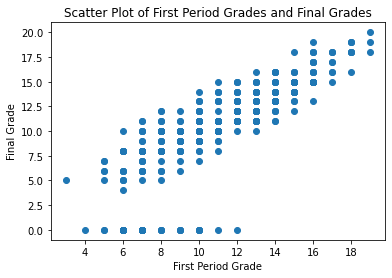

In [24]:
x_coords = np.array(observations["G1"])
y_coords = np.array(observations["G3"])

if len(x_coords) != len(y_coords):
    print("coordinates unstable")
    exit()
else:
    plt.scatter(x_coords, y_coords)
    plt.title("Scatter Plot of First Period Grades and Final Grades")
    plt.xlabel("First Period Grade")
    plt.ylabel("Final Grade")
    plt.show()

## Processing

### Mean Calculations
Note that the 'statistics' python library could be used, but we defined a function here to calculate a simple mean for our coordinates.

In [25]:
def mean(sample):
    return sum(sample) / len(sample)

x_mean = mean(x_coords)
y_mean = mean(y_coords)

print(x_mean, y_mean)

10.90886075949367 10.415189873417722


### b1 Calculations
Here we are trying to calculate b1 which is the slope of the linear regression function using the least squares method.

In [26]:
sum_xy_diffs = 0
sum_x_diff_squares = 0

for x, y in zip(x_coords, y_coords):
    sum_xy_diffs += (x - x_mean) * (y - y_mean)
    sum_x_diff_squares += (x - x_mean) ** 2

b1 = sum_xy_diffs / sum_x_diff_squares

print(sum_xy_diffs, sum_x_diff_squares)

4801.946835443046 4340.71898734177


### b0 Calculations
Using our solved b1, x & y means and simple algebra, we can solve for b0 after manipulating the linear equation.

In [27]:
b0 = y_mean - (b1 * x_mean)

print(b1, b0)

1.1062560947728453 -1.6528038288004812


## Output

### Graphing Linear Regression

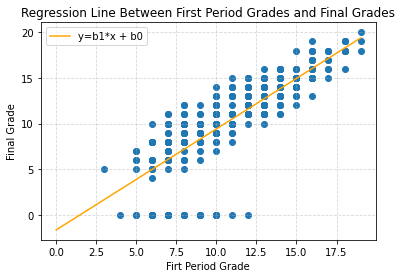

In [28]:
x = np.array(range(0, 20))
y = b1*x + b0;
plt.plot(x,y, label='y=b1*x + b0', c='orange')
plt.scatter(x_coords, y_coords)
plt.grid(alpha=.5,linestyle='--')
plt.title("Regression Line Between First Period Grades and Final Grades")
plt.xlabel("Firt Period Grade")
plt.ylabel("Final Grade")
plt.legend()
plt.show()